In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train-chennai-sale.csv')

In [3]:
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

## UNDERSTANDING THE DATA
 <a id =0> </a>


<html>
<style>
html{font-family:Monaco;}

</style>
<h3 style = "font-family:Arial" >IN SALE_COND COLUMN:</h3>
    <strong>FAMILY</strong>: SELLLING HOUSE TO YOUR OWN FAMILY/KIN<br>
    <strong>PARTIAL</strong>: ONLY SELLING A PART OF THE HOUSE<br>
    <strong>ADJLAND</strong>: SELLING A NEABY LAND<br>
    <strong>NORMAL SALE</strong>: NORMAL SALE<br>
    <strong>ABNORMAL</strong>: IF ITS NONE OF THE ABOVE CONDITION<br>
</html>

<html>
<style>
h3{font-family:"Arial";}
</style>
<h3 >IN BUILD TYPE COLUMN:</h3>
    <strong>House</strong>: Normal House<br>
    <strong>Commercial</strong>: For Commercial Purposes<br>
    <strong>Others</strong>: Houses for other purposes<br>
</html>

<html>
<style>
h3{font-family:"Helvetica";}
</style>
<h3 >IN MZZONE COLUMN:</h3>
<strong>A</strong>: Agricultural<br>
<strong>I</strong>: Industrial<br>
<strong>C</strong>: Commercial<br>
<strong>RL</strong>: Residential Low Density<br>
<strong>RM</strong>: Residential Medium Density<br>
<strong>RH</strong>: Residential High Density
</html>

<html>
<style>
h3{font-family:"Arial";}
</style>
<h4 >IN PARK_FACIL COLUMN:</h4>Whether Parking Facility is available or not? (Yes/No)
<h4 >IN UTILITY_AVAIL COLUMN:</h4>What all facilites are availabe in the house...
<h4 >IN STREET COLUMN:</h4>Whether the road connected to the house is Paved, Gravel or has NO Acess
</html>

<span style = "font:Monaco">BEFORE I SELL THE HOUSE WOULD I KNOW THE REG_FEE AND COMMIS FEE?</span> <br>
<span style =" font-size: 16px">`OBVIOUSLY NO(REMOVE THE COLUMNS)`</span>

## DATA CLEANING/TRANSFORMATION

> 1. <SPAN style = "color:GREEN;font-size:15.5px">[CONVERTING COL HEADERS INTO `LOWER CASE`](#1)<SPAN><br>
> 2. <SPAN style = "color:GREEN;font-size:15.5px">[CLEANING AND TRANFORMING](#2)<SPAN><br>
    >> a. [CORRECTING SPELLING MISTAKES OF CATEGORICAL COLS](#2.1)<br>
    >> b. [FILLING NaN VALUES OF NUMERICAL COLS](#2.2)<br>
    >> c. [DROPPING THE DUPLICATE ROWS](#2.3)<br>
    >> d. [CHANGING THE TYPES](#2.4) <br>
> 3. <SPAN style = "color:GREEN;font-size:15.5px">[FINDING (Derived Feature) `house_age = date_sale - date_build`](#3)<SPAN><br>
> 4. <SPAN style = "color:GREEN;font-size:15.5px">[DROPPING `Prt_id(unique), Date_sale, Date_Built, Reg_fee & Commis`<SPAN> COLUMNS](#4)<br>

## EDA
> 1. <SPAN style = "color:GREEN;font-size:15.5px">[UNIVARIATE ANALYSIS](#21)<SPAN><BR>
> 2. <SPAN style = "color:GREEN;font-size:15.5px">[BIVARIATE ANALYSIS](#22)<SPAN>

## ENCODING
> 1. <SPAN style = "color:GREEN;font-size:15.5px">[ONE HOT ENCODING](#31)<SPAN><BR>
> 2. <SPAN style = "color:GREEN;font-size:15.5px">[LABEL ENCODING](#32)<SPAN>

## SPLITTING 
[click here](#4)

## SCALING 
> 1. <SPAN style = "color:GREEN;font-size:15.5px">[STANDARD SCALER](#5)<SPAN><BR>

## MODELLING 
> 1. [LINEAR REGRESSION](#6.1)<BR>
> 2. [KNN](#6.2)<BR>
> 3. [DECISION TREE](#6.3)<BR>
> 4. [RANDOM FOREST](#6.4)<BR>
> 5. [XGBOOST](#6.5)<BR>

## FEATURE IMPORTANCES
[click here](#7)

## CONCLUSION
[click here](#8)

## DATA CLEANING/TRANSFORMATION

 <a id =1> </a>
<b style = "font-size:15.5px">STEP 1:</b> <i style = "color:blue;font-size:15.5px"> CONVERTING COL HEADERS INTO `LOWER CASE`<i><br>

In [4]:
#STEP 1
new_dict ={}
for i in df.columns:
    new_dict.update({i:i.lower()})
df = df.rename(columns=new_dict)

In [5]:
df.columns

Index(['prt_id', 'area', 'int_sqft', 'date_sale', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'sale_cond', 'park_facil', 'date_build',
       'buildtype', 'utility_avail', 'street', 'mzzone', 'qs_rooms',
       'qs_bathroom', 'qs_bedroom', 'qs_overall', 'reg_fee', 'commis',
       'sales_price'],
      dtype='object')

 <a id =2> </a>
<b style = "font-size:16.5px">STEP 2:</b><i style = "color:blue;font-size:16.5px">  CLEANING AND TRANSFORMING COLS</i>

 <a id =2.1> </a>
 <b style = "font-size:15.5px">STEP 2a:</b><i style = "color:blue;font-size:15.5px">  CHECK FOR SPELLING MISTAKES IN THE CATEGORICAL COLS</i>

In [6]:
col_list =['area','sale_cond','park_facil','buildtype','utility_avail','street']
print("Printing unique value of the categorical columns: \n")
for i in col_list:
    print("{} column: {}\t\n".format(i,df[i].unique()))

Printing unique value of the categorical columns: 

area column: ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']	

sale_cond column: ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']	

park_facil column: ['Yes' 'No' 'Noo']	

buildtype column: ['Commercial' 'Others' 'Other' 'House' 'Comercial']	

utility_avail column: ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']	

street column: ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']	



In [7]:
#Correcting the spelling mistakes of the above columns
df['area'] = df.area.replace({'Karapakam':'Karapakkam','Anna Nagar':'AnnaNagar','Ana Nagar':'AnnaNagar','Ann Nagar':'AnnaNagar',\
                              'KK Nagar':'KKNagar','T Nagar':'TNagar',\
                              'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet',\
                              'Velchery':'Velachery','Adyr':'Adyar'
                             })
df['sale_cond'] = df.sale_cond.replace({'Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial','Adj Land':'AdjLand','Normal Sale':'NormalSale'})
df['park_facil'] = df.park_facil.replace({'Noo':'No'})
df['buildtype'] = df.buildtype.replace({'Other':'Others','Comercial':'Commercial'})
df['utility_avail'] = df.utility_avail.replace({'All Pub':'AllPub','NoSeWa':'NoSewr','NoSewr ':'NoSewr'})
df['street'] = df.street.replace({'No Access':'NoAccess','Pavd':'Paved'})

In [8]:
col_list =['area','sale_cond','park_facil','buildtype','utility_avail','street']
print("Printing unique value of the categorical columns: \n")
for i in col_list:
    print("{} column: {}\t\n".format(i,df[i].unique()))

Printing unique value of the categorical columns: 

area column: ['Karapakkam' 'AnnaNagar' 'Adyar' 'Velachery' 'Chrompet' 'KKNagar'
 'TNagar']	

sale_cond column: ['AbNormal' 'Family' 'Partial' 'AdjLand' 'NormalSale']	

park_facil column: ['Yes' 'No']	

buildtype column: ['Commercial' 'Others' 'House']	

utility_avail column: ['AllPub' 'ELO' 'NoSewr']	

street column: ['Paved' 'Gravel' 'NoAccess']	



 <a id =2.2> </a>
<b style = "font-size:16px">STEP 2b:</b><p style = "color:blue;"><strong style = "font-size:15.5px">FILLING NULL VALUES</strong><br><SPAN style = "font-size:14px"><i>1. Filling NULL values with mean for the numerical columns</i><br><i>2. Filling NULL values with mode for discrete numerical columns</i></SPAN></p>

In [9]:
df.isna().sum()


prt_id            0
area              0
int_sqft          0
date_sale         0
dist_mainroad     0
n_bedroom         1
n_bathroom        5
n_room            0
sale_cond         0
park_facil        0
date_build        0
buildtype         0
utility_avail     0
street            0
mzzone            0
qs_rooms          0
qs_bathroom       0
qs_bedroom        0
qs_overall       48
reg_fee           0
commis            0
sales_price       0
dtype: int64

In [10]:
df['n_bedroom'] =df['n_bedroom'].fillna(1)
df['n_bathroom'] =df['n_bathroom'].fillna(1)
df['qs_overall'] =df['qs_overall'].fillna(df['qs_overall'].mean())

In [11]:
df.isnull().sum()

prt_id           0
area             0
int_sqft         0
date_sale        0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
date_build       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
reg_fee          0
commis           0
sales_price      0
dtype: int64

 <a id =2.3> </a>
<b style = "font-size:15.5px">STEP 2c:</b><i style = "font-family:Helvetica;color:blue;font-size:15.5px"> CHECKING FOR DUPLICATE ROWS AND DROPPING THEM</i>

In [12]:
df = df.drop_duplicates()
df.shape

(7109, 22)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prt_id         7109 non-null   object 
 1   area           7109 non-null   object 
 2   int_sqft       7109 non-null   int64  
 3   date_sale      7109 non-null   object 
 4   dist_mainroad  7109 non-null   int64  
 5   n_bedroom      7109 non-null   float64
 6   n_bathroom     7109 non-null   float64
 7   n_room         7109 non-null   int64  
 8   sale_cond      7109 non-null   object 
 9   park_facil     7109 non-null   object 
 10  date_build     7109 non-null   object 
 11  buildtype      7109 non-null   object 
 12  utility_avail  7109 non-null   object 
 13  street         7109 non-null   object 
 14  mzzone         7109 non-null   object 
 15  qs_rooms       7109 non-null   float64
 16  qs_bathroom    7109 non-null   float64
 17  qs_bedroom     7109 non-null   float64
 18  qs_overa

 <a id =2.4> </a>
<b style = "font-size:15.5px">STEP 2d:</b><i style = "color:blue;font-size:15.5px">CONVERTING n_bathroom AND n_bedroom INTO INT DATATYPE</i>

In [14]:
df.n_bathroom = df.n_bathroom.astype('int64')
df.n_bedroom = df.n_bedroom.astype('int64')

 <a id =3> </a>
<b style = "font-size:15.5px">STEP 3:</b><i style = "color:blue;font-size:15.5px"> FINDING DERIVED FEATURE `house_age`</i>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prt_id         7109 non-null   object 
 1   area           7109 non-null   object 
 2   int_sqft       7109 non-null   int64  
 3   date_sale      7109 non-null   object 
 4   dist_mainroad  7109 non-null   int64  
 5   n_bedroom      7109 non-null   int64  
 6   n_bathroom     7109 non-null   int64  
 7   n_room         7109 non-null   int64  
 8   sale_cond      7109 non-null   object 
 9   park_facil     7109 non-null   object 
 10  date_build     7109 non-null   object 
 11  buildtype      7109 non-null   object 
 12  utility_avail  7109 non-null   object 
 13  street         7109 non-null   object 
 14  mzzone         7109 non-null   object 
 15  qs_rooms       7109 non-null   float64
 16  qs_bathroom    7109 non-null   float64
 17  qs_bedroom     7109 non-null   float64
 18  qs_overa

<i style = "color:blue;font-size:14px">CONVERTING THE DATE COLUMNS INTO DATE TIME</i>

In [16]:
df['date_sale'] =pd.to_datetime(df['date_sale'])
df['date_build'] =pd.to_datetime(df['date_build']);

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   prt_id         7109 non-null   object        
 1   area           7109 non-null   object        
 2   int_sqft       7109 non-null   int64         
 3   date_sale      7109 non-null   datetime64[ns]
 4   dist_mainroad  7109 non-null   int64         
 5   n_bedroom      7109 non-null   int64         
 6   n_bathroom     7109 non-null   int64         
 7   n_room         7109 non-null   int64         
 8   sale_cond      7109 non-null   object        
 9   park_facil     7109 non-null   object        
 10  date_build     7109 non-null   datetime64[ns]
 11  buildtype      7109 non-null   object        
 12  utility_avail  7109 non-null   object        
 13  street         7109 non-null   object        
 14  mzzone         7109 non-null   object        
 15  qs_rooms       7109 n

In [18]:
df['house_age']= np.round((df.date_sale - df.date_build).dt.days/365.25,2)

In [19]:
df['house_age']

0       43.89
1       10.99
2       19.58
3       21.98
4       29.57
        ...  
7104    49.12
7105     8.75
7106    28.62
7107    31.33
7108    43.97
Name: house_age, Length: 7109, dtype: float64

<b style = "font-size:15.5px">STEP 4:</b><i style = "color:blue;font-size:15.5px"> REMOVING THE EXTRA COLS</i>

In [20]:
df.columns

Index(['prt_id', 'area', 'int_sqft', 'date_sale', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'sale_cond', 'park_facil', 'date_build',
       'buildtype', 'utility_avail', 'street', 'mzzone', 'qs_rooms',
       'qs_bathroom', 'qs_bedroom', 'qs_overall', 'reg_fee', 'commis',
       'sales_price', 'house_age'],
      dtype='object')

In [21]:
df.drop(['prt_id','date_sale','date_build','reg_fee', 'commis'],axis = 1,inplace = True)

In [22]:
df.head()

area  int_sqft  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0  Karapakkam      1004            131          1           1       3   
1   AnnaNagar      1986             26          2           1       5   
2       Adyar       909             70          1           1       3   
3   Velachery      1855             14          3           2       5   
4  Karapakkam      1226             84          1           1       3   

  sale_cond park_facil   buildtype utility_avail  street mzzone  qs_rooms  \
0  AbNormal        Yes  Commercial        AllPub   Paved      A       4.0   
1  AbNormal         No  Commercial        AllPub  Gravel     RH       4.9   
2  AbNormal        Yes  Commercial           ELO  Gravel     RL       4.1   
3    Family         No      Others        NoSewr   Paved      I       4.7   
4  AbNormal        Yes      Others        AllPub  Gravel      C       3.0   

   qs_bathroom  qs_bedroom  qs_overall  sales_price  house_age  
0          3.9         4.9       4.330      7600000      43.89  
1          4.2         2.5       3.765     21717770      10.99  
2          3.8         2.2       3.090     13159200      19.58  
3          3.9         3.6       4.010      9630290      21.98  
4          2.5         4.1       3.290      7406250      29.57

<i style = "color:blue;font-size:14px"> REORDERING THE INDEXES</i>

In [23]:
col_list = []
col_list = list(df.columns[:-2])+list(df.columns[-1:-3:-1])
df = df.reindex(columns = col_list)

In [24]:
df.head()

area  int_sqft  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0  Karapakkam      1004            131          1           1       3   
1   AnnaNagar      1986             26          2           1       5   
2       Adyar       909             70          1           1       3   
3   Velachery      1855             14          3           2       5   
4  Karapakkam      1226             84          1           1       3   

  sale_cond park_facil   buildtype utility_avail  street mzzone  qs_rooms  \
0  AbNormal        Yes  Commercial        AllPub   Paved      A       4.0   
1  AbNormal         No  Commercial        AllPub  Gravel     RH       4.9   
2  AbNormal        Yes  Commercial           ELO  Gravel     RL       4.1   
3    Family         No      Others        NoSewr   Paved      I       4.7   
4  AbNormal        Yes      Others        AllPub  Gravel      C       3.0   

   qs_bathroom  qs_bedroom  qs_overall  house_age  sales_price  
0          3.9         4.9       4.330      43.89      7600000  
1          4.2         2.5       3.765      10.99     21717770  
2          3.8         2.2       3.090      19.58     13159200  
3          3.9         3.6       4.010      21.98      9630290  
4          2.5         4.1       3.290      29.57      7406250

In [25]:
df= df.rename(columns = {'house_age':'house_age(in years)'})

In [26]:
df.isna().sum()

area                   0
int_sqft               0
dist_mainroad          0
n_bedroom              0
n_bathroom             0
n_room                 0
sale_cond              0
park_facil             0
buildtype              0
utility_avail          0
street                 0
mzzone                 0
qs_rooms               0
qs_bathroom            0
qs_bedroom             0
qs_overall             0
house_age(in years)    0
sales_price            0
dtype: int64

## EDA

 <a id =21> </a>
<b style = "font-size:15.5px">STEP 1:</b><i style = "color:blue;font-size:15.5px"> UNIVARIATE ANALYSIS</i>

In [27]:
cat_columns =['area','n_bedroom','n_bathroom','n_room','sale_cond','park_facil','buildtype','utility_avail','street','mzzone']
numerical_columns = ['int_sqft','dist_mainroad','qs_rooms','qs_bathroom','qs_bedroom','qs_overall','house_age(in years)']

<i style = "color:blue;font-size:14px"> CATEGORICAL COLS UNIVARIATE ANALYSIS</i>

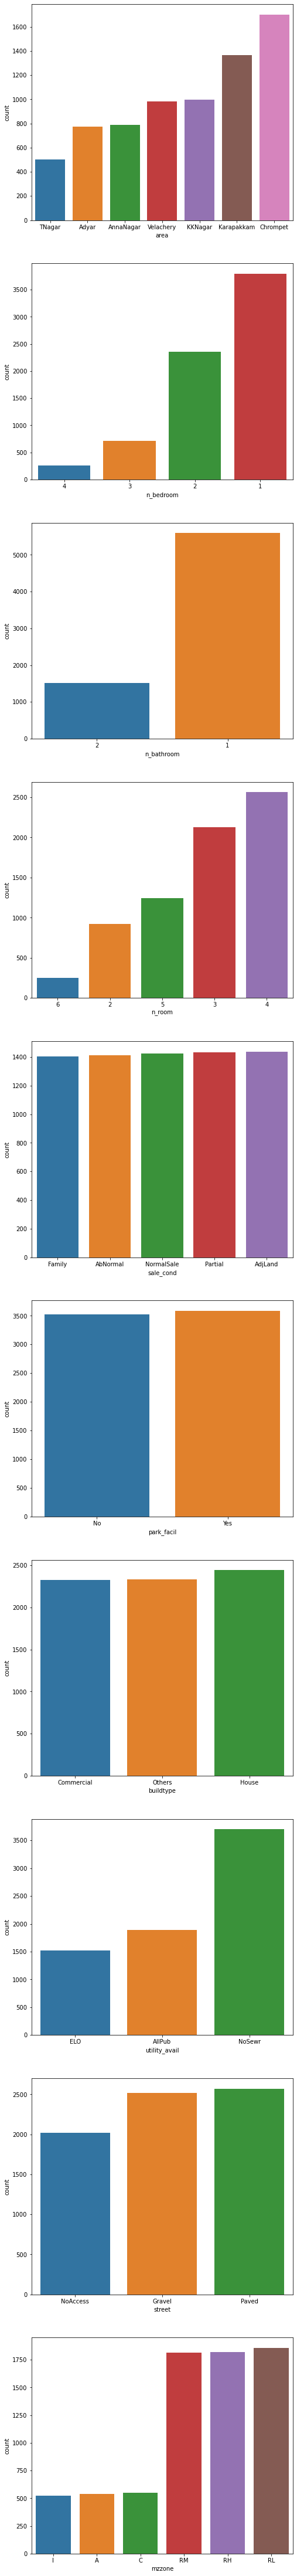

In [28]:
figure,axes = plt.subplots(len(cat_columns),1,figsize=(8,8*len(cat_columns)))
for index,i in enumerate(cat_columns):
    sns.countplot(ax=axes[index],x= i,data =df,order = df[i].value_counts().index[::-1])

<span style = "color: red"><b>Inferences from the above plot:</b></span>
<span style = "color: gray"><br>
1. Chrompet has most number of house while TNagar has the least.<br>
2. Houses with 1 bedroom is most preferred following by 2 bedrooms.<br>
3. Houses with 3 to 4 rooms is most preffered.<br>
4. Almost half of the houses doesn't have parking facility.<br>
5. 52% of houses does have no Sewer facility.<br>
6. 28% of houses doesn't have proper road access.<br>
7. Houses for Industrial,Agricultural and Commercial Purposes are very less.</span>

<i style = "color:blue;font-size:14px"> NUMERICAL COLS UNIVARIATE ANALYSIS</i>

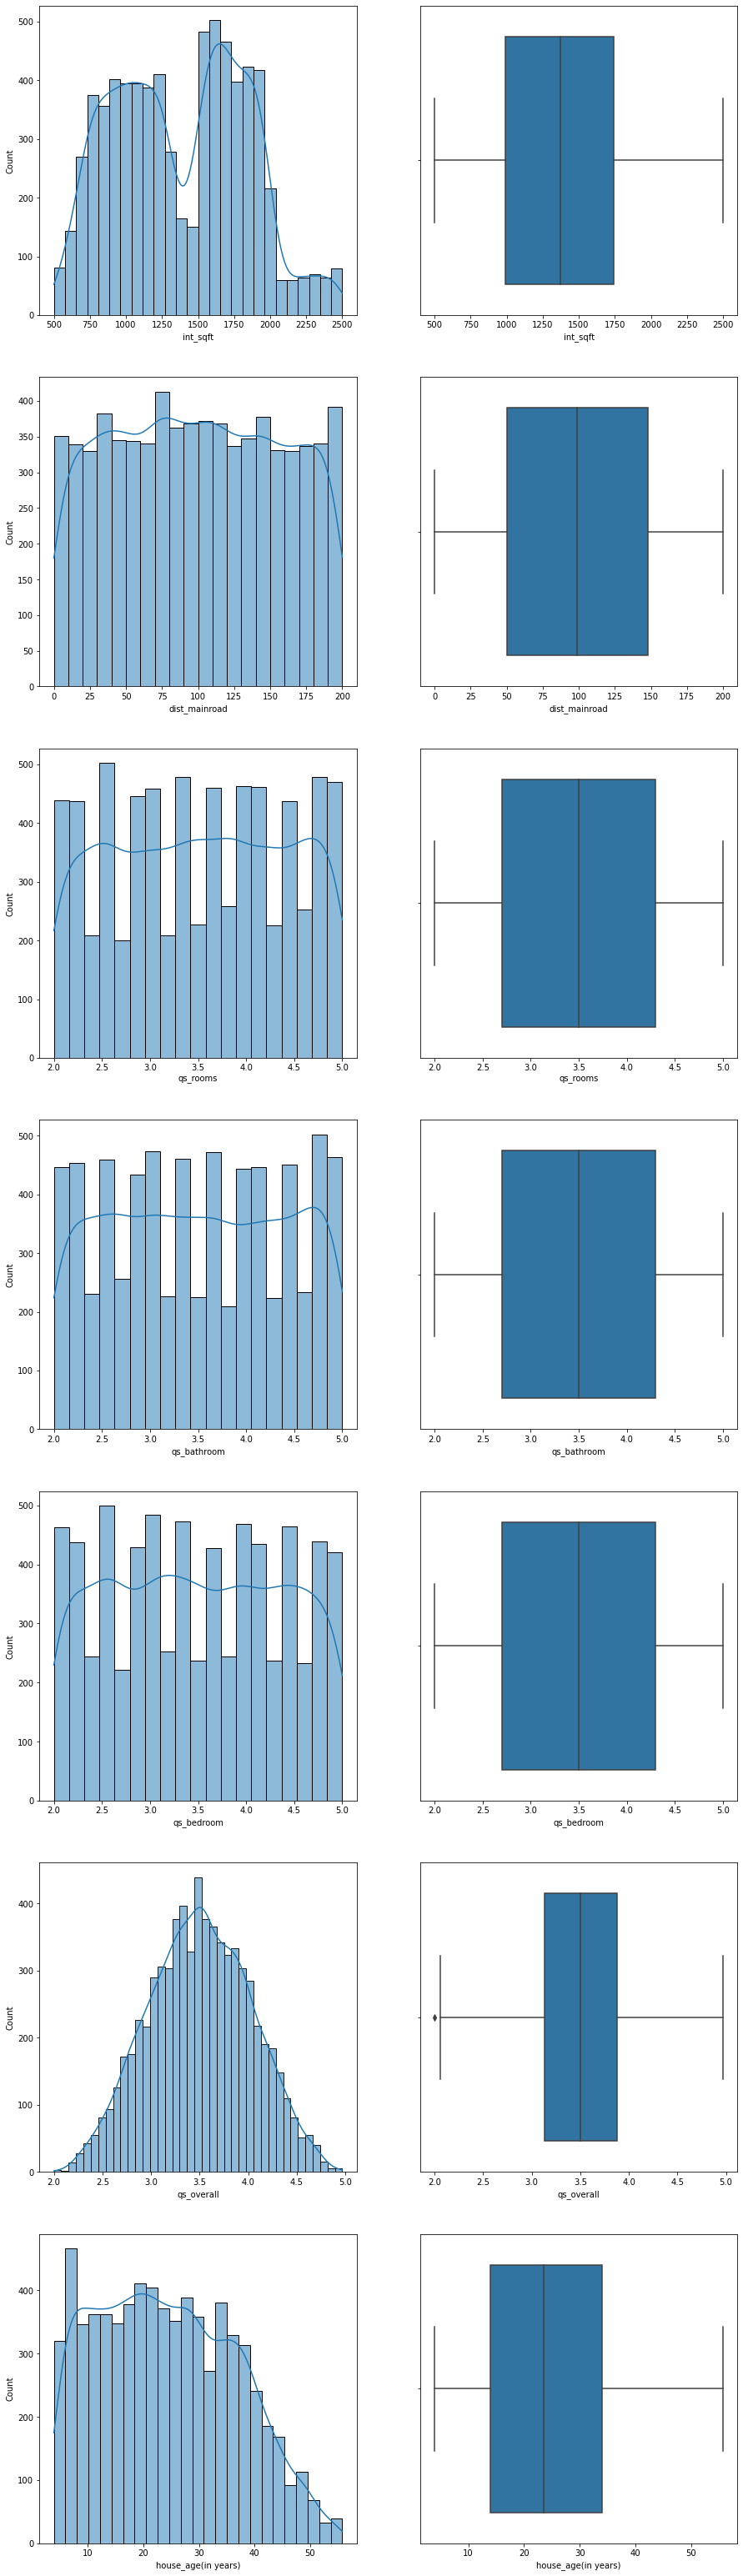

In [29]:
figure,axes = plt.subplots(len(numerical_columns),2,figsize=(15,8*len(numerical_columns)))
for index,i in enumerate(numerical_columns):
    sns.histplot(ax = axes[index][0],x=df[i],kde = True)
    sns.boxplot(ax = axes[index][1],x=df[i],orient = 'h')
    
    

Although qs_overall has an outlier but we cannot remove it, removing it may lead to pattern loss.

 <a id =22> </a>
<b style = "font-size:15.5px">STEP 2:</b><i style = "color:blue;font-size:15.5px"> BIVARIATE ANALYSIS</i>

In [30]:
numerical_columns = ['int_sqft','dist_mainroad','qs_overall']
new_cols = ['qs_rooms','qs_bathroom','qs_bedroom','grp_house_age']
cat_columns =['area','n_bedroom','n_bathroom','n_room','sale_cond','park_facil','buildtype','utility_avail','street','mzzone']

<i style = "color:blue;font-size:14px"> CATEGORICAL COLS BIVARIATE ANALYSIS</i>

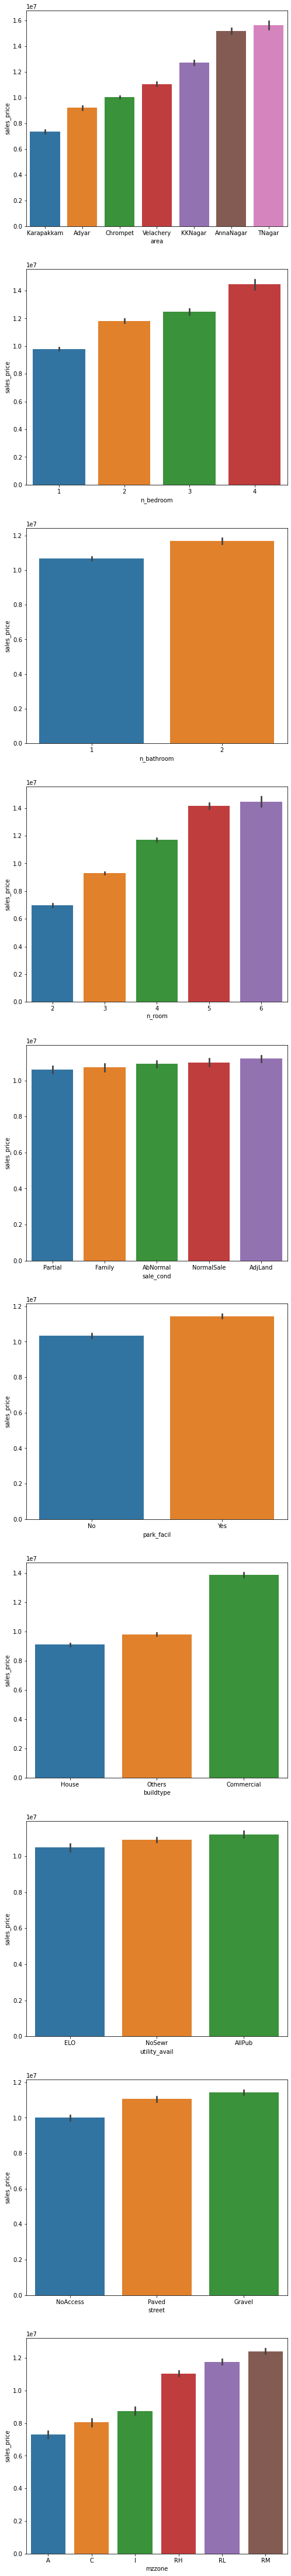

In [31]:
figure,axes = plt.subplots(len(cat_columns),1,figsize=(8,8*len(cat_columns)))
for index,i in enumerate(cat_columns):
    sns.barplot(ax=axes[index],x= i,y='sales_price',data =df,order = df.groupby(i)['sales_price'].mean().reset_index().sort_values('sales_price')[i])

No change needed: `n_bedroom`<BR>
Label Encoding: `area,park_facil,utility_avail,street,mzzone(0,1,2,4,5,6),n_bathroom,n_room(0,1,2,3,3)`<BR>
One Hot Encoding: `buildtyp`e<BR>
Drop: `sale_cond(it shows uniform relationship no relationship with target variable)`<BR>

<i style = "color:blue;font-size:14px"> NUMERICAL COLS BIVARIATE ANALYSIS</i>

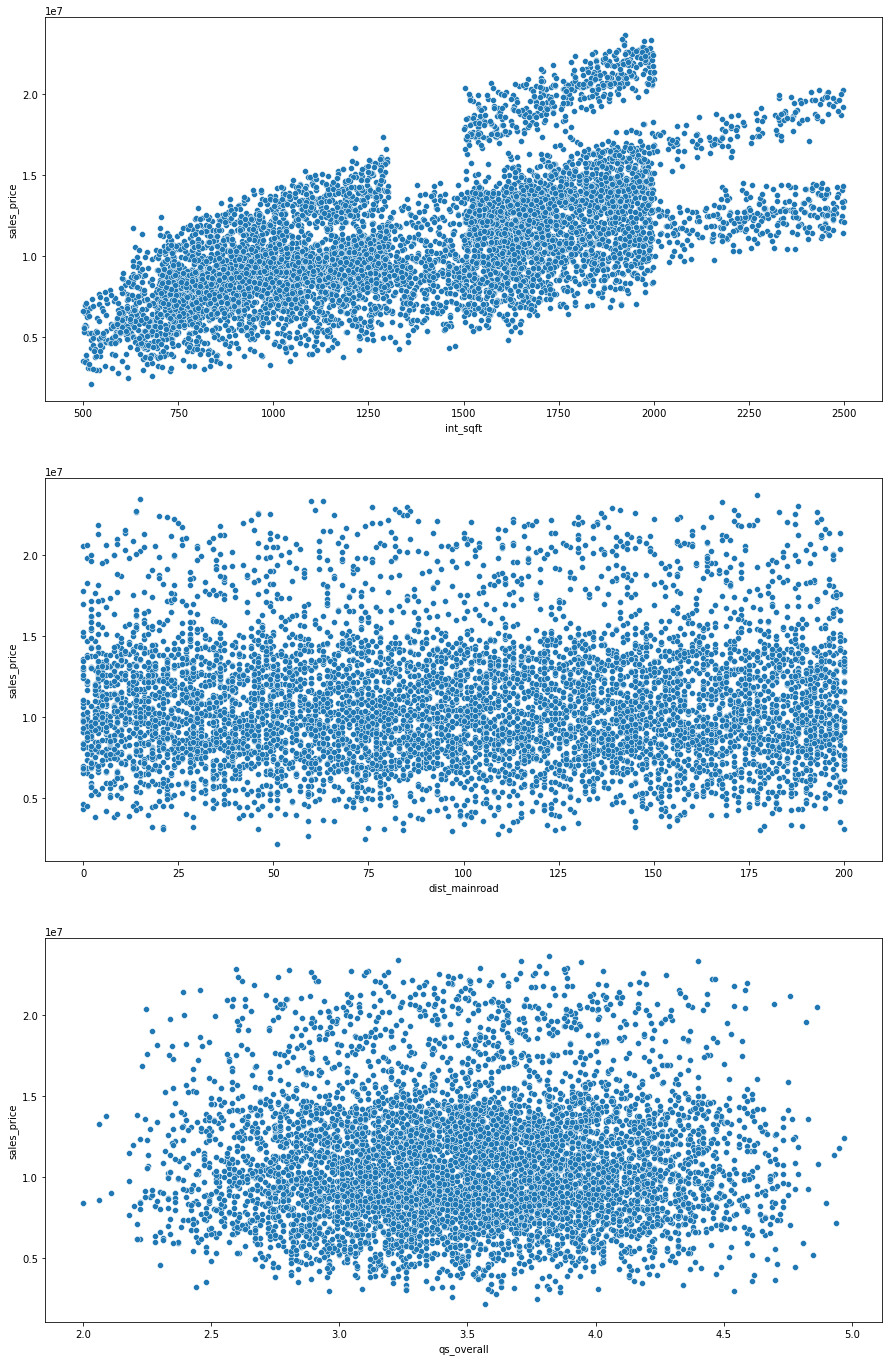

In [32]:
figure,axes = plt.subplots(len(numerical_columns),1,figsize=(15,8*len(numerical_columns)))
for index,i in enumerate(numerical_columns):
    sns.scatterplot(ax = axes[index],x=df[i],y=df['sales_price'])
    

<i style = "color:blue;font-size:15.5px"> BINNING HOUSE AGE, QS_ROOMS, QS_BATHROOM AND QS_BEDROOM FOR BETTER VISUALIZATION<br></i>

In [33]:
#it bins the house age into 10 bins
df['grp_house_age'] = pd.cut(df['house_age(in years)'],10)

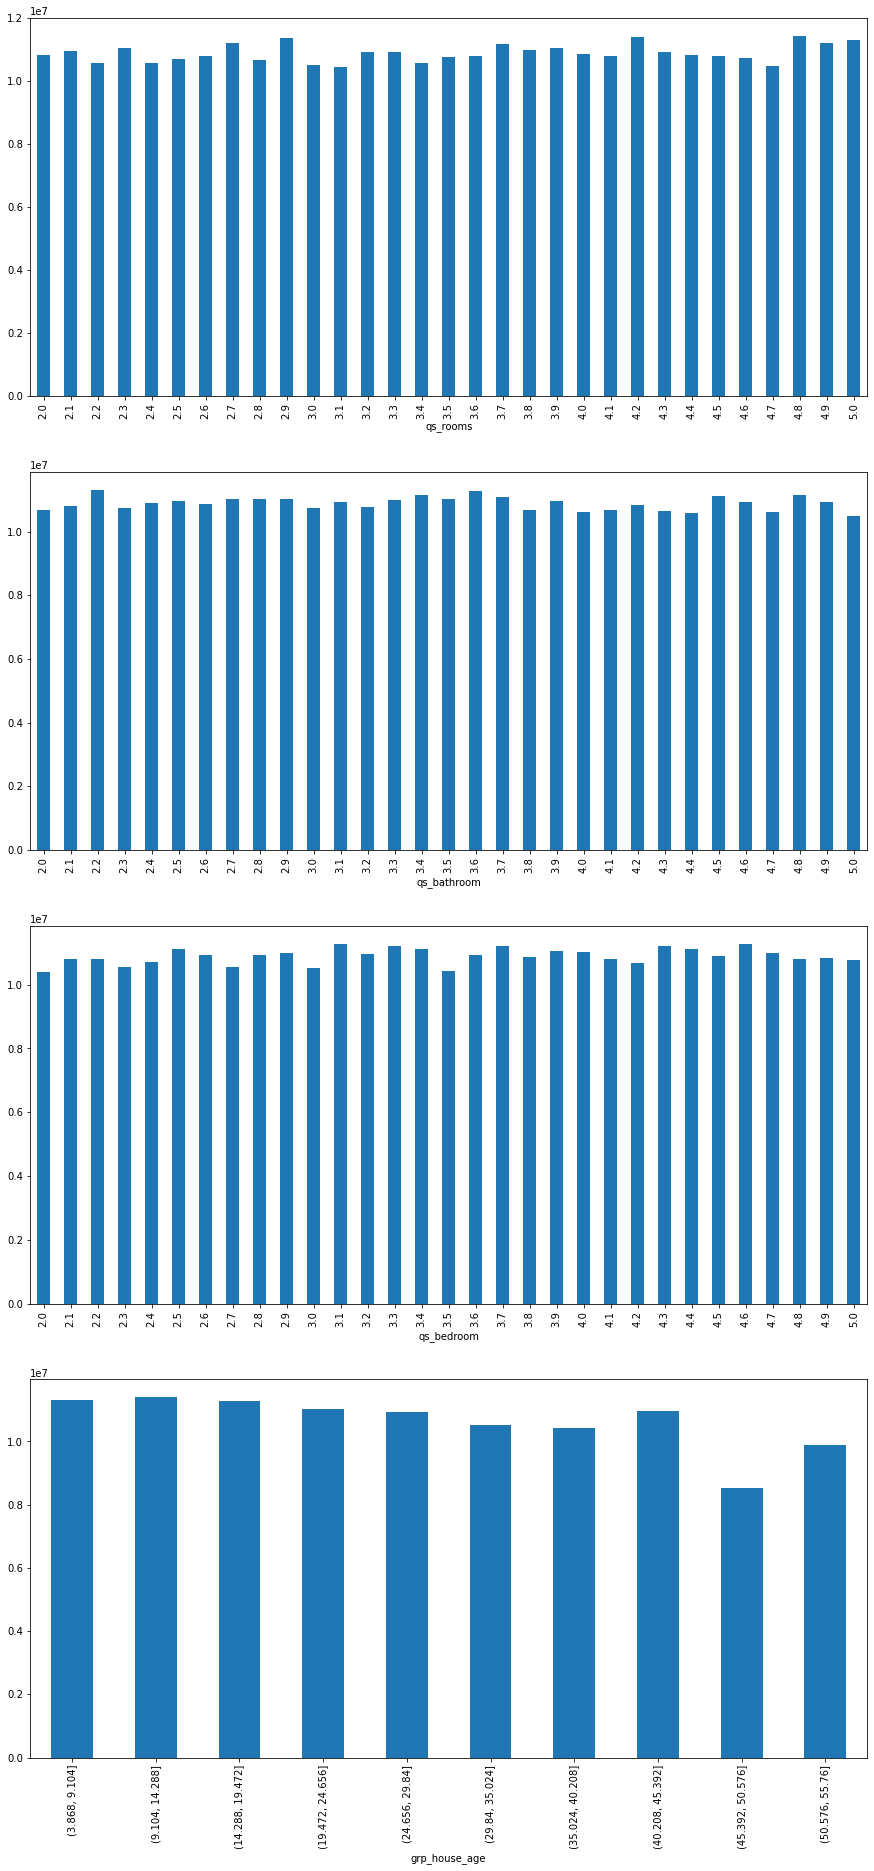

In [34]:
new_cols = ['qs_rooms','qs_bathroom','qs_bedroom','grp_house_age']
figure,axes = plt.subplots(len(new_cols),1,figsize=(15,8*len(new_cols)))
for index,i in enumerate(new_cols):
    df.groupby(i)['sales_price'].mean().plot(kind = 'bar',ax = axes[index])

Drop: qs_rooms,qs_bathroom,qs_bedroom,dist_mainroad

## ENCODING

<i style = "color:blue;font-size:14px"> MAKING A BACKUP COPY</i>

In [35]:
data = df.copy(deep = False)

In [36]:
df1 = data.copy(deep = False)

In [37]:
df.head()

area  int_sqft  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0  Karapakkam      1004            131          1           1       3   
1   AnnaNagar      1986             26          2           1       5   
2       Adyar       909             70          1           1       3   
3   Velachery      1855             14          3           2       5   
4  Karapakkam      1226             84          1           1       3   

  sale_cond park_facil   buildtype utility_avail  street mzzone  qs_rooms  \
0  AbNormal        Yes  Commercial        AllPub   Paved      A       4.0   
1  AbNormal         No  Commercial        AllPub  Gravel     RH       4.9   
2  AbNormal        Yes  Commercial           ELO  Gravel     RL       4.1   
3    Family         No      Others        NoSewr   Paved      I       4.7   
4  AbNormal        Yes      Others        AllPub  Gravel      C       3.0   

   qs_bathroom  qs_bedroom  qs_overall  house_age(in years)  sales_price  \
0          3.9         4.9       4.330                43.89      7600000   
1          4.2         2.5       3.765                10.99     21717770   
2          3.8         2.2       3.090                19.58     13159200   
3          3.9         3.6       4.010                21.98      9630290   
4          2.5         4.1       3.290                29.57      7406250   

      grp_house_age  
0  (40.208, 45.392]  
1   (9.104, 14.288]  
2  (19.472, 24.656]  
3  (19.472, 24.656]  
4   (24.656, 29.84]

 <a id =31> </a>
<b style = "font-size:15.5px">STEP 1:</b><i style = "color:blue;font-size:15.5px"> ONE HOT ENCODING</i>

In [38]:
#one hot encoding for build type column
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(drop = 'first')

In [39]:
build = pd.DataFrame(oh.fit_transform(df[['buildtype']]).toarray())

In [40]:
df['buildtype0'] = build.iloc[:,0]
df['buildtype1'] = build.iloc[:,1]

In [41]:
df.head()

area  int_sqft  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0  Karapakkam      1004            131          1           1       3   
1   AnnaNagar      1986             26          2           1       5   
2       Adyar       909             70          1           1       3   
3   Velachery      1855             14          3           2       5   
4  Karapakkam      1226             84          1           1       3   

  sale_cond park_facil   buildtype utility_avail  ... mzzone qs_rooms  \
0  AbNormal        Yes  Commercial        AllPub  ...      A      4.0   
1  AbNormal         No  Commercial        AllPub  ...     RH      4.9   
2  AbNormal        Yes  Commercial           ELO  ...     RL      4.1   
3    Family         No      Others        NoSewr  ...      I      4.7   
4  AbNormal        Yes      Others        AllPub  ...      C      3.0   

   qs_bathroom  qs_bedroom  qs_overall  house_age(in years)  sales_price  \
0          3.9         4.9       4.330                43.89      7600000   
1          4.2         2.5       3.765                10.99     21717770   
2          3.8         2.2       3.090                19.58     13159200   
3          3.9         3.6       4.010                21.98      9630290   
4          2.5         4.1       3.290                29.57      7406250   

      grp_house_age buildtype0  buildtype1  
0  (40.208, 45.392]        0.0         0.0  
1   (9.104, 14.288]        0.0         0.0  
2  (19.472, 24.656]        0.0         0.0  
3  (19.472, 24.656]        0.0         1.0  
4   (24.656, 29.84]        0.0         1.0  

[5 rows x 21 columns]

In [42]:
df['area'].unique()

array(['Karapakkam', 'AnnaNagar', 'Adyar', 'Velachery', 'Chrompet',
       'KKNagar', 'TNagar'], dtype=object)

 <a id =32> </a>
<b style = "font-size:15.5px">STEP 2:</b><i style = "color:blue;font-size:15.5px"> LABEL ENCODING</i>

In [43]:
#label encoding 
df.area = df.area.map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,\
'KKNagar':4,'AnnaNagar':5,'TNagar':6
})
df.park_facil = df.park_facil.map({'Yes':1,'No':0})
df.utility_avail = df.utility_avail.map({'ELO':0,'NoSewr':1,"AllPub":2})
df.street = df.street.map({'NoAccess':0,'Paved':1,'Gravel':2})
df.mzzone = df.mzzone.map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})
df.n_room = df.n_room.map({2:0,3:1,4:2,5:3,6:3})

In [44]:
# delete qs_bedroom,bathroom,room,distfrommainroad
df.drop(['sale_cond','buildtype','dist_mainroad','qs_rooms','qs_bathroom','qs_bedroom'],axis =1 ,inplace = True)
df.head()

area  int_sqft  n_bedroom  n_bathroom  n_room  park_facil  utility_avail  \
0     0      1004          1           1       1           1              2   
1     5      1986          2           1       3           0              2   
2     1       909          1           1       1           1              0   
3     3      1855          3           2       3           0              1   
4     0      1226          1           1       1           1              2   

   street  mzzone  qs_overall  house_age(in years)  sales_price  \
0       1       0       4.330                43.89      7600000   
1       2       4       3.765                10.99     21717770   
2       2       5       3.090                19.58     13159200   
3       1       2       4.010                21.98      9630290   
4       2       1       3.290                29.57      7406250   

      grp_house_age  buildtype0  buildtype1  
0  (40.208, 45.392]         0.0         0.0  
1   (9.104, 14.288]         0.0         0.0  
2  (19.472, 24.656]         0.0         0.0  
3  (19.472, 24.656]         0.0         1.0  
4   (24.656, 29.84]         0.0         1.0

 <a id =4> </a>
## SPLITTING

In [45]:
y = df['sales_price']
x = df.drop(['sales_price','grp_house_age'],axis =1) 

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 20)

 <a id =5> </a>
## SCALING

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()

In [49]:
x_train= pd.DataFrame(sc.fit_transform(x_train),columns = x_train.columns)

In [50]:
x_train

area  int_sqft  n_bedroom  n_bathroom    n_room  park_facil  \
0    -0.844066 -0.513836  -0.791773   -0.516597 -0.691736    0.995321   
1    -0.844066 -0.605813  -0.791773   -0.516597 -0.691736    0.995321   
2     1.308650  0.933694   0.456288   -0.516597  1.407691   -1.004701   
3     1.308650  0.668715  -0.791773   -0.516597  0.357978   -1.004701   
4     1.846829  1.244661   0.456288   -0.516597  1.407691    0.995321   
...        ...       ...        ...         ...       ...         ...   
5326  0.232292  0.815439   0.456288   -0.516597  0.357978    0.995321   
5327 -0.305887 -0.408721  -0.791773   -0.516597 -0.691736    0.995321   
5328  1.846829  0.686234  -0.791773   -0.516597  0.357978   -1.004701   
5329  1.846829  0.931504   0.456288   -0.516597  1.407691    0.995321   
5330  0.770471 -0.189730  -0.791773   -0.516597 -0.691736    0.995321   

      utility_avail    street    mzzone  qs_overall  house_age(in years)  \
0          1.384644 -0.088278  0.484531    0.219354             1.190713   
1         -0.063284  1.173413 -2.207250    0.047875            -0.024621   
2         -0.063284 -0.088278 -0.053826    0.810004             1.278275   
3         -1.511212 -0.088278 -0.053826   -0.256976            -0.607560   
4          1.384644 -1.349970  1.022887    1.067222            -0.834574   
...             ...       ...       ...         ...                  ...   
5326      -0.063284  1.173413  1.022887    1.476866             0.380760   
5327      -0.063284 -1.349970  1.022887   -1.133424            -0.834574   
5328      -1.511212 -0.088278  1.022887   -1.162004            -1.576422   
5329      -0.063284 -1.349970  1.022887   -1.476382            -1.239955   
5330      -0.063284 -0.088278  1.022887    0.676631            -0.753498   

      buildtype0  buildtype1  
0       1.368888   -0.707107  
1      -0.730520    1.414214  
2      -0.730520    1.414214  
3      -0.730520   -0.707107  
4       1.368888   -0.707107  
...          ...         ...  
5326    1.368888   -0.707107  
5327   -0.730520    1.414214  
5328   -0.730520   -0.707107  
5329   -0.730520    1.414214  
5330   -0.730520   -0.707107  

[5331 rows x 13 columns]

 <a id =6> </a>
## MODELLING

In [51]:
from xgboost import plot_importance,XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [52]:
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score as cvs

In [53]:
# lr = LinearRegression()
# kn = KNeighborsRegressor() # check with weighted distnace and no of estimators
# dt = DecisionTreeRegressor() #change the max depth
# rf = RandomForestRegressor()
# ab = AdaBoostRegressor()
# gr = GradientBoostingRegressor()
# xg = xg()

#### LINEAR REGRESSION
<a id =6.1> </a>

In [54]:
score = {}

In [55]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print("Linear Regressor Training score: ",lr.score(x_train,y_train))
print("Linear Regressor Cross Validation score: ",cvs(lr,x_train,y_train,cv=10,scoring = 'r2').mean()) ;

Linear Regressor Training score:  0.9129347733399702
Linear Regressor Cross Validation score:  0.9120807004250727


In [56]:
score['Linear Regression'] = cvs(lr,x_train,y_train,cv=10,scoring = 'r2').mean()

In [57]:
score

{'Linear Regression': 0.9120807004250727}

In [58]:
lr.intercept_

10901346.838304259

In [59]:
#after scaling check the data

<AxesSubplot:>

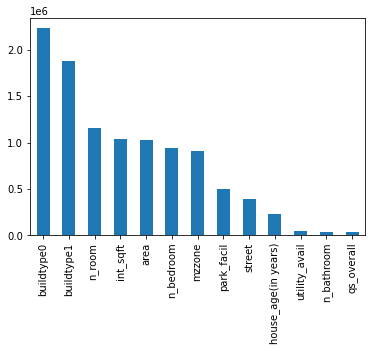

In [60]:
coef = pd.Series({i:abs(j) for i,j in zip(x_train.columns,lr.coef_)})
coef.sort_values(ascending = False).plot(kind = "bar")

In [61]:
'''
here there are separate feature imoportances values for buildtype0 and buildype1, 
what if we want the feature importances of the column buildtype?
''';

#### KNN
<a id =6.2> </a>

In [62]:
#KNN
dict = {}
for i in range(5,150):
    kn = KNeighborsRegressor(n_neighbors=i)
    dict[i] = cvs(kn,x_train,y_train,cv = 10,scoring = 'r2').mean()
    kn.fit(x_train,y_train)
    print("Cross Validation Score for {}th neighbour:".format(i),cvs(kn,x_train,y_train,cv = 10,scoring = 'r2').mean())

li = []
for i,j in dict.items():
    if len(li) == 0:
        li.extend([i,j])
    elif dict[i] > li[1]:
        li[0] = i
        li[1] = dict[i]
print("\nThe best score for KNN is {} for n neighbours:{}".format(li[1],li[0]))


Cross Validation Score for 5th neighbour: 0.9433452550196405
Cross Validation Score for 6th neighbour: 0.9429536648151087
Cross Validation Score for 7th neighbour: 0.9416094198839577
Cross Validation Score for 8th neighbour: 0.9410856194476628
Cross Validation Score for 9th neighbour: 0.940011492440607
Cross Validation Score for 10th neighbour: 0.9382598160011316
Cross Validation Score for 11th neighbour: 0.9373578870963006
Cross Validation Score for 12th neighbour: 0.9360116631965797
Cross Validation Score for 13th neighbour: 0.9352724918122819
Cross Validation Score for 14th neighbour: 0.9341246044242674
Cross Validation Score for 15th neighbour: 0.9332999051124119
Cross Validation Score for 16th neighbour: 0.9319122104218229
Cross Validation Score for 17th neighbour: 0.9303411799917086
Cross Validation Score for 18th neighbour: 0.9293194274988679
Cross Validation Score for 19th neighbour: 0.9282553060659421
Cross Validation Score for 20th neighbour: 0.9268474252787955
Cross Validati

Cross Validation Score for 137th neighbour: 0.8423422077108663
Cross Validation Score for 138th neighbour: 0.841811788161694
Cross Validation Score for 139th neighbour: 0.8412670416314704
Cross Validation Score for 140th neighbour: 0.8406769329383854
Cross Validation Score for 141th neighbour: 0.8400917776751904
Cross Validation Score for 142th neighbour: 0.8395228315300596
Cross Validation Score for 143th neighbour: 0.8389187437272982
Cross Validation Score for 144th neighbour: 0.8382523158929527
Cross Validation Score for 145th neighbour: 0.8376733514636513
Cross Validation Score for 146th neighbour: 0.8371001680468391
Cross Validation Score for 147th neighbour: 0.8365353337466006
Cross Validation Score for 148th neighbour: 0.836014590727131
Cross Validation Score for 149th neighbour: 0.8355134543419709

The best score for KNN is 0.9433452550196405 for n neighbours:5


In [63]:
kn = KNeighborsRegressor(n_neighbors=5)
score['KNN'] = cvs(kn,x_train,y_train,cv = 10,scoring = 'r2').mean()

#### DECISION TREE
<a id =6.3> </a>

In [64]:
#DECISION TREE
dict = {}
new_dict = {}
for i in range(3,20):
    dt = DecisionTreeRegressor(max_depth = i)
    dt.fit(x_train,y_train)
    dict[i] = {'tr':dt.score(x_train,y_train),'te':cvs(dt,x_train,y_train,cv = 10).mean()}
    new_dict[i] = cvs(dt,x_train,y_train,cv = 10,scoring = 'r2').mean()
    print("For maximum depth = ",i)
    print("Training Score:",dt.score(x_train,y_train))
    print("Cross Validation Score:",cvs(dt,x_train,y_train,cv = 10,scoring = 'r2').mean())
    
li = []
for i,j in new_dict.items():
    if len(li) == 0:
        li.extend([i,j])
    elif new_dict[i] > li[1]:
        li[0] = i
        li[1] = new_dict[i]
print("\nThe best score for Decision Tree is {} for maximum depth: {}".format(li[1],li[0]))


For maximum depth =  3
Training Score: 0.7010721695899176
Cross Validation Score: 0.6966320027811806
For maximum depth =  4
Training Score: 0.8339277951480908
Cross Validation Score: 0.8299397217061599
For maximum depth =  5
Training Score: 0.9066115141915843
Cross Validation Score: 0.9005125229320404
For maximum depth =  6
Training Score: 0.9339269171216411
Cross Validation Score: 0.924638420952142
For maximum depth =  7
Training Score: 0.9535170104005755
Cross Validation Score: 0.9431017641985134
For maximum depth =  8
Training Score: 0.9689163364755079
Cross Validation Score: 0.9543510344141233
For maximum depth =  9
Training Score: 0.9806295671284723
Cross Validation Score: 0.9620015044615882
For maximum depth =  10
Training Score: 0.9887077298815432
Cross Validation Score: 0.9650068316481383
For maximum depth =  11
Training Score: 0.9940545463153821
Cross Validation Score: 0.9670165343840201
For maximum depth =  12
Training Score: 0.9970034527642804
Cross Validation Score: 0.96686

In [65]:
dtree = pd.DataFrame(dict).T.reset_index()

Text(0, 0.5, 'Training and Cross Validation Scores')

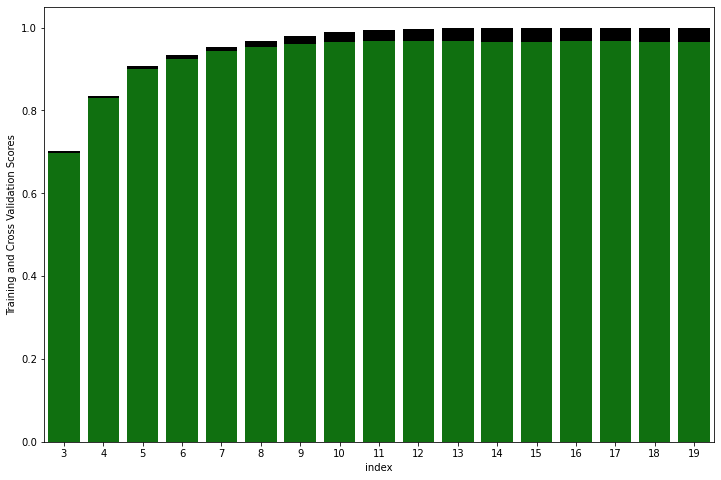

In [66]:
plt.figure(figsize = (12,8))
sns.barplot(data = dtree,y = "tr",x = "index",color = 'black')
sns.barplot(data = dtree,y = "te",x = "index",color = 'green')
plt.ylabel('Training and Cross Validation Scores')

In [67]:
dt = DecisionTreeRegressor(max_depth = 11)
dt.fit(x_train,y_train)
score['Decision Tree'] = cvs(dt,x_train,y_train,cv = 10,scoring = 'r2').mean()

#### RANDOM FOREST
<a id =6.4> </a>

In [68]:
#RANDOM FOREST
dict = {}
new_dict = {}
for i in range(3,20):
    rf = RandomForestRegressor(max_depth = i,)
    rf.fit(x_train,y_train)
    dict[i] = {'tr':rf.score(x_train,y_train),'te':cvs(rf,x_test,y_test,cv =10 ).mean()}
    new_dict[i] = cvs(dt,x_train,y_train,cv = 10,scoring = 'r2').mean()
    print("For maximum depth = ",i)
    print("Training Score:",rf.score(x_train,y_train))
    print("Validation Score:",cvs(rf,x_test,y_test,cv =10 ).mean())
    
li = []
for i,j in new_dict.items():
    if len(li) == 0:
        li.extend([i,j])
    elif new_dict[i] > li[1]:
        li[0] = i
        li[1] = new_dict[i]
print("\nThe best score for Decision Tree is {} for maximum depth: {}".format(li[1],li[0]))


For maximum depth =  3
Training Score: 0.7052270632092957
Validation Score: 0.7579235460315911
For maximum depth =  4
Training Score: 0.8418873546215273
Validation Score: 0.867611610734448
For maximum depth =  5
Training Score: 0.9146808768499667
Validation Score: 0.9239452925870408
For maximum depth =  6
Training Score: 0.9462134718826755
Validation Score: 0.9451300973606684
For maximum depth =  7
Training Score: 0.9668427607668333
Validation Score: 0.959661748197256
For maximum depth =  8
Training Score: 0.9804547799259632
Validation Score: 0.9674872908566379
For maximum depth =  9
Training Score: 0.9884956757484114
Validation Score: 0.971163256981804
For maximum depth =  10
Training Score: 0.9932397488219188
Validation Score: 0.9733743712867244
For maximum depth =  11
Training Score: 0.9957351507571859
Validation Score: 0.9742534509437952
For maximum depth =  12
Training Score: 0.9970423413155275
Validation Score: 0.9738859312835324
For maximum depth =  13
Training Score: 0.99765884

In [69]:
rforest = pd.DataFrame(dict).T.reset_index()

Text(0, 0.5, 'Training and Cross Validation Scores')

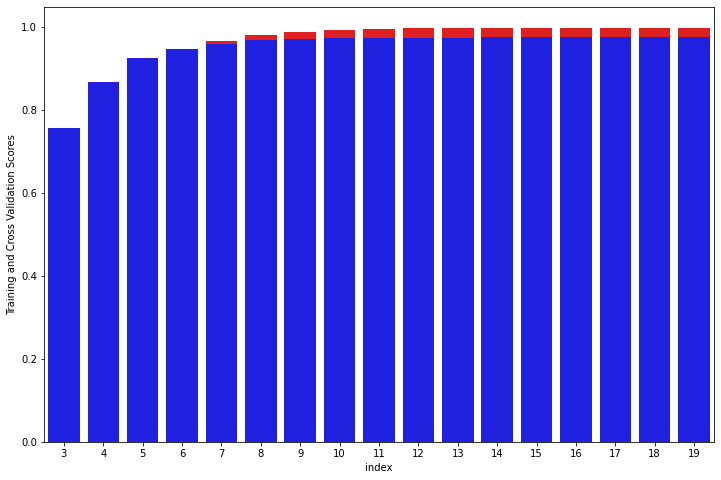

In [70]:
plt.figure(figsize = (12,8))
sns.barplot(data = rforest,y = "tr",x = "index",color = 'r')
sns.barplot(data = rforest,y = "te",x = "index",color = 'b')
plt.ylabel('Training and Cross Validation Scores')

In [71]:
dt = RandomForestRegressor(max_depth = 13)
dt.fit(x_train,y_train)
score['Random Forest'] = cvs(dt,x_train,y_train,cv = 10,scoring = 'r2').mean()
score

{'Linear Regression': 0.9120807004250727,
 'KNN': 0.9433452550196405,
 'Decision Tree': 0.966804228320037,
 'Random Forest': 0.9853156376993294}

#### XGBOOST
<a id =6.5> </a>

In [72]:
#xgboost
xg = XGBRegressor(objective ='reg:squarederror',n_estimators = 100, seed = 123,)
xg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [73]:
print("Training Score:",xg.score(x_test,y_test))
print("Validation Score:",cvs(xg,x_train,y_train,cv=10).mean())
print("Validation Score testing:",cvs(xg,x_test,y_test,cv=10).mean())

Training Score: -1.9176600198940776
Validation Score: 0.991724301850119
Validation Score testing: 0.9868870159241719


In [74]:
dict ={}
lis = [0.0001,0.001,0.11,2]
for i in np.arange(0.01,0.4,0.01):
    xg = XGBRegressor(n_estimators = 200,learning_rate = i)
    xg.fit(x_train, y_train)
    print("Learning Rate:{}".format(i))
#     print("Training Score:",xg.score(x_test,y_test))
    dict[i] = cvs(xg,x_train,y_train,cv=10).mean()
    print("Validation Score:",cvs(xg,x_train,y_train,cv=10,scoring = 'r2').mean())
#finding the highest score 
li = []
for i,j in dict.items():
    if len(li) == 0:
        li.extend([i,j])
    elif dict[i] > li[1]:
        li[0] = i
        li[1] = dict[i]
print("\nThe best score for XGBoost is {} for learning rate:{}".format(li[1],li[0]))


Learning Rate:0.01
Validation Score: 0.7870009646613582
Learning Rate:0.02
Validation Score: 0.9818203275966646
Learning Rate:0.03
Validation Score: 0.9906091066458245
Learning Rate:0.04
Validation Score: 0.992483880407294
Learning Rate:0.05
Validation Score: 0.9932256339387688
Learning Rate:0.060000000000000005
Validation Score: 0.9934858789343453
Learning Rate:0.06999999999999999
Validation Score: 0.9935638316891506
Learning Rate:0.08
Validation Score: 0.9936181871059319
Learning Rate:0.09
Validation Score: 0.993621453335237
Learning Rate:0.09999999999999999
Validation Score: 0.9937583502868488
Learning Rate:0.11
Validation Score: 0.9936054093588623
Learning Rate:0.12
Validation Score: 0.9937046136923188
Learning Rate:0.13
Validation Score: 0.9934808905545955
Learning Rate:0.14
Validation Score: 0.9934939218817771
Learning Rate:0.15000000000000002
Validation Score: 0.9934915394085945
Learning Rate:0.16
Validation Score: 0.9933042916547326
Learning Rate:0.17
Validation Score: 0.993168

In [75]:
xg = XGBRegressor(n_estimators = 200,learning_rate = 0.09999999999999999)
xg.fit(x_train, y_train)
# print("Training Score:",xg.score(x_test,y_test))
score['XGBoost'] = cvs(xg,x_train,y_train,cv=10,scoring = 'r2').mean()

In [76]:
scores = pd.Series(score)
print("These are all the scores of the Regressor Models we used: ")
print(scores);

These are all the scores of the Regressor Models we used: 
Linear Regression    0.912081
KNN                  0.943345
Decision Tree        0.966804
Random Forest        0.985316
XGBoost              0.993758
dtype: float64


#### Out of all these Regressor models XGBoost performs the best.

 <a id =7> </a>
## FEATURE IMPORTANCES

In [77]:
coef = pd.Series({i:abs(j) for i,j in zip(x_train.columns,xg.feature_importances_)})
coef.drop(['buildtype0','buildtype1'],inplace = True)

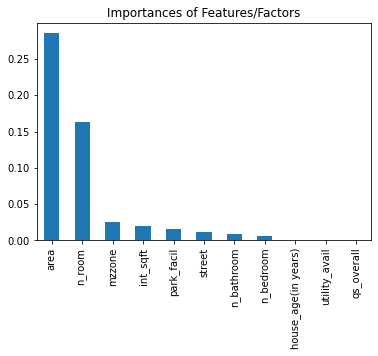

In [78]:
coef.sort_values(ascending = False).plot(kind = "bar")
plt.title('Importances of Features/Factors');
plt.show()

It is quite evident from the graph that `AREA,N_ROOM` are the important factors that decide the sale of Houses

 <a id =8> </a>

## CONCLUSION 

From the above project we found that:
1. **XGBoost** with**`n_estimators = 200 and learning_rate = 0.09999999999999999`** gives the best **`score(99.4%)`** among all other Regression Models <br> 
2. **`n_area,n_room`** are the features/factors that mostly affect the sales of houses.
<br><br>

***
<span>
And below here are a few inferences we derived:<br><br>
1. Chrompet has most number of house while TNagar has the least.<br>
2. Houses with 1 bedroom is most preferred following by 2 bedrooms.<br>
3. Houses with 3 to 4 rooms is most preffered.<br>
4. Almost half of the houses doesn't have parking facility.<br>
5. 52% of houses does have no Sewer facility.<br>
6. 28% of houses doesn't have proper road access.<br>
7. Houses for Industrial,Agricultural and Commercial Purposes are very less</span>

[go to the top](#0)